In [4]:
import numpy as np



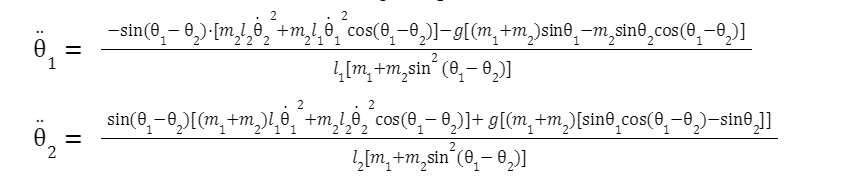

In [26]:
class System:
    def __init__(self,
        m1:float=1,
        m2:float=1,
        l1:float=1,
        l2:float=1,
        theta_1_initial:float=0,
        theta_2_initial:float=0,
        theta_1_dot_initial:float=0.05,
        theta_2_dot_initial:float=0.1,
        theta_1_dot_dot_initial:float=None,
        theta_2_dot_dot_initial:float=None,
        step:float=0.1):
        self.m1 = m1
        self.m2 = m2
        self.l1 = l1
        self.l2 = l2
        self.theta_1_initial = theta_1_initial
        self.theta_2_initial = theta_2_initial
        self.theta_1_dot_initial = theta_1_dot_initial
        self.theta_2_dot_initial = theta_2_dot_initial
        self.theta_1_dot_dot_initial = theta_1_dot_dot_initial
        self.theta_2_dot_dot_initial = theta_2_dot_dot_initial
        self.step = step
        self.g = 9.8
        self.reset()
    
    def reset(self):
        self.current_step = 0
        self.state_memory = [[self.theta_1_initial, self.theta_1_dot_initial, self.theta_1_dot_dot_initial, 
                              self.theta_2_initial, self.theta_2_dot_initial, self.theta_2_dot_dot_initial]]
        
    
    def theta_1_dot_dot(self, theta_1, theta_1_dot,theta_2,theta_2_dot):
        num = (-np.sin(theta_1-theta_2)*(self.m2*self.l2*(theta_2_dot**2) 
                +self.m2*self.l1*(theta_1_dot**2)*np.cos(theta_1-theta_2)) 
            -self.g*((self.m1 +self.m2)*np.sin(theta_1) - self.m2*(np.sin(theta_2)*np.cos(theta_1-theta_2))))
        den = self.l1*(self.m1+self.m2*((np.sin(theta_1-theta_2))**2))
        return num/den
    
    def theta_2_dot_dot(self, theta_1, theta_1_dot,theta_2,theta_2_dot):
        num = (np.sin(theta_1-theta_2)*((self.m1+self.m2)*self.l1*(theta_1_dot**2) 
                +self.m2*self.l2*(theta_2_dot**2)*np.cos(theta_1-theta_2)) 
            +self.g*((self.m1 +self.m2)*(np.sin(theta_1)*np.cos(theta_1-theta_2)-np.sin(theta_2))))
        den = self.l2*(self.m1+self.m2*((np.sin(theta_1-theta_2))**2))
        return num/den
    
    def get_current_state(self):
        current_state = self.state_memory[self.current_step]
        state = {
            'theta_1': current_state[0],
            'theta_1_dot': current_state[1],
            'theta_2': current_state[3],
            'theta_2_dot': current_state[4]
        }
        return state
        
    def insert_state(self, state):
        self.state_memory.append(state)
        self.current_step += 1    
    
    def get_derivative_functions(self):
        functions ={
            "theta_1_dot_dot": self.theta_1_dot_dot,
            "theta_2_dot_dot": self.theta_2_dot_dot
        }
        return functions
    
    def retrieve_states(self):
        return self.state_memory
    
    def retrieve_scalar_states(self):
        states = self.state_memory
        
    

In [27]:
class Euler:
    def __init__(self, step:float=0.1, n_steps:int = 1000):
        self.step = step
        self.n_steps = n_steps
        self.system = System(step=step)
        
    def symul(self):
        self.system.reset()
        derivative_functions = self.system.get_derivative_functions()
        function_theta_1_dot_dot = derivative_functions['theta_1_dot_dot']
        function_theta_2_dot_dot = derivative_functions['theta_2_dot_dot']
        for time_step in range(self.n_steps):
            current_state = self.system.get_current_state()
            theta_1 = current_state['theta_1']
            theta_1_dot = current_state['theta_1_dot']
            next_theta_1 = theta_1 + self.step*theta_1_dot
            next_theta_1_dot_dot = function_theta_1_dot_dot(**current_state)
            next_theta_1_dot = theta_1_dot + self.step*next_theta_1_dot_dot
            
            
            theta_2 = current_state['theta_2']
            theta_2_dot = current_state['theta_2_dot']
            next_theta_2 = theta_2 + self.step*theta_2_dot
            next_theta_2_dot_dot = function_theta_2_dot_dot(**current_state)
            next_theta_2_dot = theta_2_dot + self.step*next_theta_2_dot_dot
            
            next_state =[next_theta_1, next_theta_1_dot, next_theta_1_dot_dot, 
                         next_theta_2, next_theta_2_dot, next_theta_2_dot_dot]
            self.system.insert_state(next_state)
        
eu = Euler()

eu.symul()

In [28]:
eu.system.retrieve_states()

[[0, 0.05, None, 0, 0.1, None],
 [0.005000000000000001, 0.05, -0.0, 0.010000000000000002, 0.1, 0.0],
 [0.010000000000000002,
  0.05000600481127692,
  6.0048112769156275e-05,
  0.020000000000000004,
  0.09019290860150807,
  -0.09807091398491939],
 [0.015000600481127694,
  0.0500146791008719,
  8.674289594982387e-05,
  0.02901929086015081,
  0.07058304082731681,
  -0.19609867774191259],
 [0.020002068391214885,
  0.04905740269726376,
  -0.00957276403608141,
  0.03607759494288249,
  0.0431018028333847,
  -0.27481237993932106],
 [0.02490780866094126,
  0.04520761834171847,
  -0.038497843555452875,
  0.04038777522622096,
  0.011598847467283034,
  -0.3150295536610167],
 [0.029428570495113108,
  0.035963466948645946,
  -0.09244151393072526,
  0.041547659972949263,
  -0.01873053255490039,
  -0.3032938002218342],
 [0.0330249171899777,
  0.018998282362914877,
  -0.1696518458573107,
  0.039674606717459225,
  -0.04247315475482647,
  -0.23742622199926078],
 [0.03492474542626919,
  -0.006846151889000

In [2]:
M1 = 1
M2 = 2
L1 = 1
L2 = 2
G = 9.8

THETA_1_INITIAL = 0
THETA_1_DOT_INITIAL = 0


THETA_2_INITIAL = 0
THETA_2_DOT_INITIAL = 0


In [3]:
theta_dot = lambda theta_1, theta_0, step: (theta_1 - theta_0)/step

def theta_1_dot_dot(theta_1, theta_2, theta_1_dot,theta_2_dot, step):
    global M1,M2,L1,L2,G
    num = (-np.sin(theta_1-theta_2)*(M2*L2*(theta_2_dot**2) 
            +M2*L1*(theta_1_dot**2)*np.cos(theta_1-theta_2)) 
           -G*((M1 +M2)*np.sin(theta_1) - M2*(np.sin(theta_2)*np.cos(theta_1-theta_2))))
    den = L1*(M1+M2*((np.sin(theta_1-theta_2))**2))
    return num/den
    
def theta_2_dot_dot(theta_1, theta_2, theta_1_dot,theta_2_dot, step):
    global M1,M2,L1,L2,G
    num = (np.sin(theta_1-theta_2)*((M1+M2)*L1*(theta_1_dot**2) 
            +M2*L2*(theta_2_dot**2)*np.cos(theta_1-theta_2)) 
           +G*((M1 +M2)*(np.sin(theta_1)*np.cos(theta_1-theta_2)-np.sin(theta_2))))
    den = L2*(M1+M2*((np.sin(theta_1-theta_2))**2))
    return num/den